## 1.Problem statement :
### Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

## 2.DATA PRESENTATION

### 2.1Data Dictionary
#### <center> Train file: CSV containing the customers for whom loan eligibility is known as 'Loan_Status'</center>

|Variable|Description|
|--------|-----------|
|Loan_ID|Unique Loan ID|
|Gender|Male/ Female|
|Married|Applicant married (Y/N)|
|Dependents|Number of dependents|
|Education|Applicant Education (Graduate/ Under Graduate)|
|Self_Employed|Self employed (Y/N)|
|ApplicantIncome|Applicant income|
|CoapplicantIncome|Coapplicant income|
|LoanAmount|Loan amount in thousands|
|Loan_Amount_Term|Term of loan in months|
|Credit_History|credit history meets guidelines|
|Property_Area|Urban/ Semi Urban/ Rural|
|Loan_Status|(Target) Loan approved (Y/N)|

#### <center> Test file: CSV containing the customer information for whom loan eligibility is to be predicted</center>

|Variable|Description|
|--------|-----------|
|Loan_ID|Unique Loan ID|
|Gender|Male/ Female|
|Married|Applicant married (Y/N)|
|Dependents|Number of dependents|
|Education|Applicant Education (Graduate/ Under Graduate)|
|Self_Employed|Self employed (Y/N)|
|ApplicantIncome|Applicant income|
|CoapplicantIncome|Coapplicant income|
|LoanAmount|Loan amount in thousands|
|Loan_Amount_Term|Term of loan in months|
|Credit_History|credit history meets guidelines|
|Property_Area|Urban/ Semi Urban/ Rural|

#### <center>Submission file format</center>

|Variable|Description|
|--------|-----------|
|Loan_ID|Unique Loan ID|
|Loan_Status|(Target) Loan approved (Y/N)|

In [1]:
#importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## 3.Loading data


In [2]:
#Training data
train_df  = pd.read_csv("train.csv")

#Testing data
test_df = pd.read_csv("test.csv")

### 3.1 Describing and transforming columns

#### 3.1.1 Describing the data structure

In [3]:
print(f"Number of rows in our train data : {train_df.shape[0]}\nNumber of Columns in our train data : {train_df.shape[1]}")

Number of rows in our train data : 614
Number of Columns in our train data : 13


In [4]:
print(f"Number of rows in our test data : {test_df.shape[0]}\nNumber of Columns in our test data : {test_df.shape[1]}")

Number of rows in our test data : 367
Number of Columns in our test data : 12


In [5]:
#Detailed description of the data with the info() method of pandas.
#Train data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#Test data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [7]:
#Display of some observations with the pandas head() method 
#train data
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
#test data
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### 3.1.2 Management of line duplications

In [9]:
#train_data
train_df.duplicated().sum()

0

In [10]:
#column Loan_ID
train_df.duplicated(["Loan_ID"]).sum()

0

In [11]:
#test_data
test_df.duplicated().sum()

0

In [12]:
#Column Loan_ID
test_df.duplicated(["Loan_ID"]).sum()

0

### 4.Data exploration

#### 4.1 EXTRACTING DESCRIPTIVE STATISTICS

#### 4.1.1 Statistics for quantitative data

In [13]:
#Train_data
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [14]:
# correlation matrix
train_df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


### 4.4.2 Statistics for qualitative data

In [15]:
for col in train_df.select_dtypes(object).columns:
    print(f"Column {col} :")
    print(f"number of modalities {train_df[col].nunique()}")
    print(f"list of modalities {train_df[col].unique()}")
    print(f"frequency of occurrence of modalities \n{train_df[col].value_counts()}")
    print()

Column Loan_ID :
number of modalities 614
list of modalities ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 

In [16]:
train_df.describe(include="object").transpose()

,count,unique,top,freq
Loan_ID,614,614,LP001637,1
Gender,601,2,Male,489
Married,611,2,Yes,398
Dependents,599,4,0,345
Education,614,2,Graduate,480
Self_Employed,582,2,No,500
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


### 4.4.3 Data visualization
#### In this project I will use graphs to see how the dependent variable behaves in relation to some independent variables.

Text(0.5, 1.0, "Claimant's income as a function of the predictor variable ( Loan_Status) and gender")

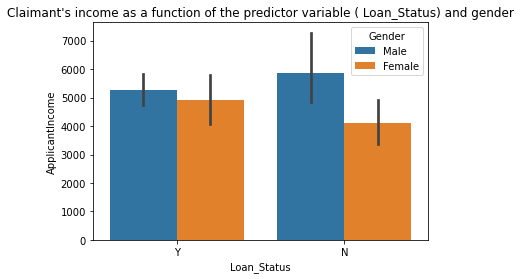

In [17]:
sns.barplot(x = "Loan_Status", y = "ApplicantIncome", hue = "Gender", data = train_df)
plt.title("Claimant's income as a function of the predictor variable ( Loan_Status) and gender")

Text(0.5, 1.0, 'Frequency of responses by gender')

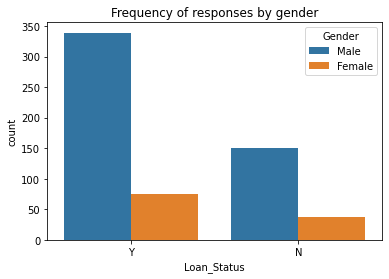

In [18]:
sns.countplot(x = "Loan_Status", hue = "Gender", data = train_df)
plt.title("Frequency of responses by gender")

Text(0.5, 1.0, 'Frequency of responses by marital status')

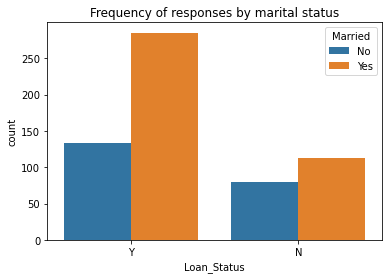

In [19]:
sns.countplot(x = "Loan_Status", hue = "Married", data = train_df)
plt.title("Frequency of responses by marital status")

Text(0.5, 1.0, 'Frequency of responses by education')

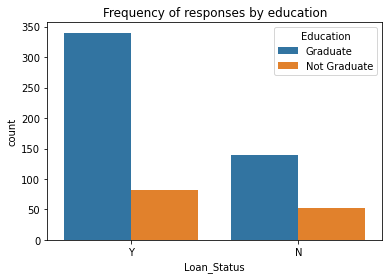

In [20]:
sns.countplot(x = "Loan_Status", hue = "Education", data = train_df)
plt.title("Frequency of responses by education")

Text(0.5, 1.0, 'Frequency of responses by dependents')

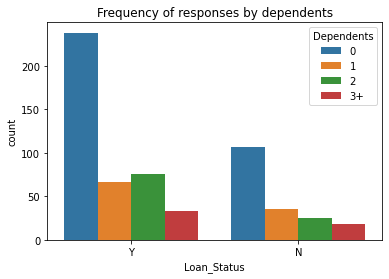

In [21]:
sns.countplot(x = "Loan_Status", hue = "Dependents", data = train_df)
plt.title("Frequency of responses by dependents")

Text(0.5, 1.0, 'Frequency of responses by Property_Area')

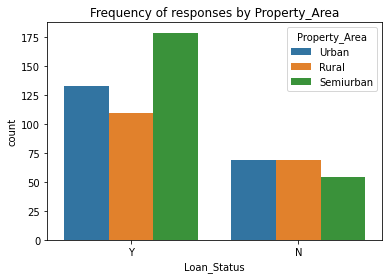

In [22]:
sns.countplot(x = "Loan_Status", hue = "Property_Area", data = train_df)
plt.title("Frequency of responses by Property_Area")

### 5. Data preparation
Alternative: using the ColumnTransformer class
When you want to automate the processing of several columns, the ColumnTransformer
class allows you to combine several transformations. The following code allows you to differentiate the columns

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline

In [24]:
numeric_features = train_df.select_dtypes(include = np.number).columns
categorical_features = train_df.select_dtypes(include = object).columns

In [25]:
numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']

In [26]:
categorical_features = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area']

In [27]:
# we will apply a transformation to these columns
# Scale numeric values
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [28]:
# we will apply a OneHot transformation to these columns
# One-hot encode categorical values
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [29]:
# all this information is combined in an object of the
# class ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, selector(dtype_include=np.number)),
        ('cat', cat_transformer, selector(dtype_include=object))])

In [30]:
X = train_df.drop('Loan_Status', axis=1)
y = train_df['Loan_Status']

In [31]:
#Once this object is created, we can apply the transformations using the following code:
# apply the transformations to all the columns
train_clean = preprocessor.fit_transform(X)
#The new structure includes all transformed data.

In [32]:
train_clean = train_clean.toarray()

For the separation, we use the train_test_split() function of Scikit-Learn. This function allows
to automatically create as many structures as necessary from our data. It uses a
randomization of the individuals and then a separation according to a parameter of the type test_size :

In [33]:
# we import the function
from sklearn.model_selection import train_test_split
# in this case we have :
x_train, x_test, y_train, y_test = train_test_split(train_clean,y,test_size=0.2, random_state = 42, stratify = y)

### 6. The choice and adjustment of the algorithm

In [34]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [35]:
modele_rf = RandomForestClassifier()
modele_knn = KNeighborsClassifier()
modele_svm = svm.SVC()
modele_dtc = DecisionTreeClassifier()
modele_gbc = GradientBoostingClassifier()

In [36]:
modele_rf.fit(x_train, y_train)
modele_knn.fit(x_train, y_train)
modele_svm.fit(x_train, y_train)
modele_dtc.fit(x_train, y_train)
modele_gbc.fit(x_train, y_train)

GradientBoostingClassifier()

#### 6.1 Improving evaluation through cross-validation

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
scores_rf = cross_val_score(modele_rf, x_train, y_train, cv=5)
scores_knn = cross_val_score(modele_knn, x_train, y_train, cv=5)
scores_svm = cross_val_score(modele_svm, x_train, y_train, cv=5)
scores_dtc = cross_val_score(modele_dtc, x_train, y_train, cv=5)
scores_gbc = cross_val_score(modele_gbc, x_train, y_train, cv=5)

In [39]:
print("AUC pour RF :% 0.2f (+/-% 0.2f)"% (scores_rf.mean(), scores_rf.std() * 2))
print("AUC pour kNN : % 0.2f (+/-% 0.2f)"% (scores_knn.mean(), scores_knn.std() * 2))
print("AUC pour SVM :% 0.2f (+/-% 0.2f)"% (scores_svm.mean(), scores_svm.std() * 2))
print("AUC pour DTC : % 0.2f (+/-% 0.2f)"% (scores_dtc.mean(), scores_dtc.std() * 2))
print("AUC pour gbc : % 0.2f (+/-% 0.2f)"% (scores_gbc.mean(), scores_gbc.std() * 2))

AUC pour RF : 0.79 (+/- 0.02)
AUC pour kNN :  0.77 (+/- 0.03)
AUC pour SVM : 0.79 (+/- 0.03)
AUC pour DTC :  0.75 (+/- 0.03)
AUC pour gbc :  0.79 (+/- 0.02)


#### Gradient boosting for classification has the best score, so I will use the grid search to adjust its parameters

#### 6.2 Grid search

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

grid_search = GridSearchCV(modele_gbc, parameters,scoring = "accuracy", cv=10, n_jobs=-1)

In [ ]:
grid_search.fit(x_train, y_train)
print(modele_gbc.score(x_train, y_train))
print(grid_search.best_params_)

In [ ]:
final_model = grid_search.best_estimator_

In [ ]:
test_df_clean = preprocessor.transform(test_df)

In [ ]:
test_df_clean

In [ ]:
final_predictions = final_model.predict(test_df_clean)

In [ ]:
final_predictions

In [ ]:
sample_submission = pd.DataFrame({
    "Loan_ID" : test_df.loc[:,"Loan_ID"],
    "Loan_Status" : final_predictions
})

In [ ]:
sample_submission.to_csv("sample_submission.csv", encoding='utf-8', index = False)